**음성파일 재생(play)해보기**

In [44]:
from pydub import AudioSegment
from pydub.playback import play

audio = AudioSegment.from_file("uze.mp3", format="mp3")

play(audio)


**음성파일의 메타정보 출력해보기 (샘플링, 초/시간)**

In [45]:
frame_rate = audio.frame_rate
print("샘플링 레이트:", frame_rate)

duration_in_seconds = len(audio) / 1000 
print("음성 파일 길이 (초):", duration_in_seconds)

샘플링 레이트: 24000
음성 파일 길이 (초): 2.976


**음성파일 변환해보기 (44kHz --> 22kHz)**

In [46]:
from pydub import AudioSegment

audio = audio.set_frame_rate(24000)

audio.export("converted_audio.wav", format="wav")
play(audio)

**음성파형 (wav) 그려보기**

/Users/kimtaehyun/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


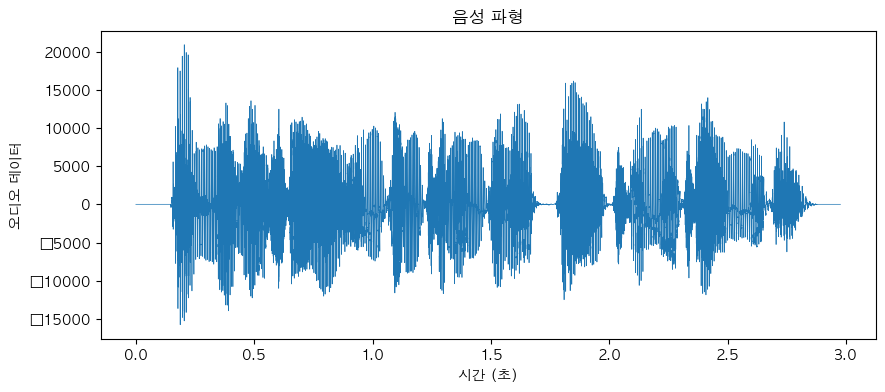

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

audio = AudioSegment.from_file("uze.mp3", format="mp3")

audio_data = np.array(audio.get_array_of_samples())

frame_rate = audio.frame_rate

time = np.arange(0, len(audio_data)) / frame_rate

plt.rcParams["font.family"] = "AppleGothic"

plt.figure(figsize=(10, 4))
plt.plot(time, audio_data, lw=0.5)
plt.xlabel("시간 (초)")
plt.ylabel("오디오 데이터")
plt.title("음성 파형")
plt.show()


**음성파일을 프리에변환 (fourier transform) 및 스펙트로그램(spectrogram) 시각화해보기**

/var/folders/dp/x42x31wn5xnd566vpw7sd7cc0000gn/T/ipykernel_72892/471330045.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='viridis')


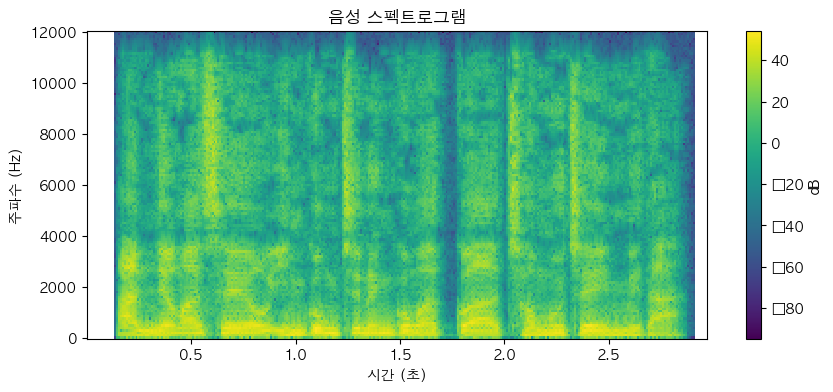

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

sample_rate, audio_data = wavfile.read("converted_audio.wav")

frequencies, times, Sxx = spectrogram(audio_data, fs=sample_rate)

plt.figure(figsize=(10, 4))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='viridis')
plt.colorbar(label='dB')
plt.xlabel('시간 (초)')
plt.ylabel('주파수 (Hz)')
plt.title('음성 스펙트로그램')
plt.show()